# Tesseract ML Engineering Challenge

Thank you for spending time on this take-home! We are delighted that you are considering a machine learning role at Tesseract Health. In this exam, you will solve a problem with immediate relevance to us: developing a model for predicting the quality of captured fundus images

## Context:

Doctors rely heavily on good quality images to confidently diagnose diseases and conditions. Thus, it is important to evaluate the quality of a captured image, namely checking that it is artifact free, has the right color balance and the required anatomical features visible, and so on. When an image quality is evaluated to be insufficient, the patient will recapture it to increase the chances of having an image that the doctor is able to interpret reliably. This is one challenge to which we apply machine learning!

Fundus imaging is a well-established retinal imaging technique. Diagnosis is done through the inspection of the optic disc, the macula, and blood vessels. In a good quality image, all these main retinal elements need to be clearly visible, depending on where the image is centered. Additionally, other quality parameters determine the overall usability of the image for interpretation such as illumination uniformity, blur, color balance, contrast, field definition and the presence of artifacts. Below, we show sample bad quality images with their labels in the title, as well as a set of good quality images.


<center> <h3>Bad Quality Images</h3> </center>

 Dust | Eye Blink | Artifact
 :- | :- | :- 
 ![alt](Data/examples/dust.png) | ![alt](Data/examples/eye_blink.png) | ![alt](Data/examples/artifact3.jpg)

Overexposed | Underexposed |  Uneven Illumination
:- | :- | :- 
![alt](Data/examples/overexposed.png) | ![alt](Data/examples/underexposed.png) | ![alt](Data/examples/unevenillum.png)



<center> <h3>Good Quality Images</h3> </center>


Right Eye | Left Eye | Left Eye  
:- | :- | :- 
![alt](Data/examples/8664_right.png) | ![alt](Data/examples/9288_left.png) | ![alt](Data/examples/978_left.png) 

Right Eye | Right Eye | Left Eye 
:- | :- | :- 
![alt](Data/examples/1034_right.png) | ![alt](Data/examples/10457_right.png) | ![alt](Data/examples/11618_left.png) 




## Challenge

**Based on this use case, your assignment is to build a model to predict the quality label of an image.** You have been given images of good (label 0) and bad quality (label 1). We have structured the assignment so that you work with incremental components of the problem in a way that gets you to a more complete understanding. Please make sure to read the directions in each steps!

As you go through this task, it is suggested that you prioritize **exploratory data analysis and principled model selection**. You are also encouraged to consider alternatives to methods you may try and suggest them as future work to explore.

## Ground Rules/Expectations

* You **are not** expected, within the limited time frame, to solve this problem entirely and invent a new way of analyzing image quality. We understand that you have a busy life, and have thus capped the amount of time you can spend on this problem to 3 hours. So, don't prioritize just getting the best performing model for each step!
* You **are** expected to communicate your overarching approach to the problem and the components we have laid out, with clear articulation of answers and presentation of supporting data (tables, plots, etc). So, do walk us through and explain how you used the available data to draw appropriate conclusions!
* You are welcome to use any open-source libraries that you would like. 


## Data

This folder consists of two components:

1. 1300 .pngs in the "fundus" folder consisting of fundus images of varying image quality
2. Two csv files containing the image name and quality label
    - Simple model subset
    
        - This file contains 300 image names and their quality labels. You will be using this subset in the first section of the assignment. Quality labels are good(0) and bad (1). The accuracy of the labels in this subset is confirmed by medically trained professionals. 
        
    - CNN subset
    
        - This file contains 1000 image names and their quality labels. Note that CNN subset does not contain any images that were listed in the simple model subset. Quality labels are good(0) and bad (1). 

Use this data to work through this assignment.

## Rubric

In evaluating this assignment, we will consider the following skills:
1. demonstration of applied ML process
2. coding style and conventions
3. ability to thoughtfully communicate rationale, methods, and next steps

Best of luck!

# Step 0: Exploratory Data Analysis

Explore the data and share your insights!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import cv2

### Define the paths for the dataset 

In [2]:
data_path = pathlib.Path("Data") 

#C:\Users\Rozita\Documents\jo app 2021\tesseract\Tesseract ML Challenge\Tesseract ML Challenge\Data
image_path = data_path /  'fundus_images'
#C:\Users\Rozita\Documents\jo app 2021\tesseract\Tesseract ML Challenge\Tesseract ML Challenge\Data\fundus_images
simple_model_subset_path = data_path/ 'simple_model_subset.csv'
cnn_subset_path = data_path/ 'cnn_subset.csv'


In [3]:
cnn_subset_path

WindowsPath('Data/cnn_subset.csv')

### Load the label files

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    300 non-null    object
 1   quality  300 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    1000 non-null   object
 1   quality  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


<AxesSubplot:>

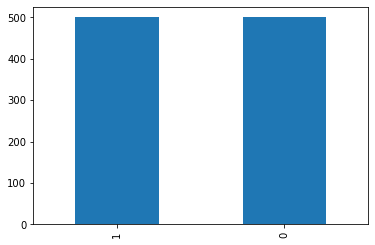

In [4]:
simple_model_subset = pd.read_csv(simple_model_subset_path, index_col=0)

cnn_subset = pd.read_csv(cnn_subset_path, index_col=0)

type(simple_model_subset)
simple_model_subset.info()  #data is balanced
cnn_subset.info()           #data is balanced 

# check if data is balance or imbalance
simple_model_subset['quality'].value_counts().plot(kind = 'bar')
cnn_subset['quality'].value_counts().plot(kind = 'bar')

In [5]:
print(simple_model_subset)
print(cnn_subset)

               image  quality
0    10218_right.png        1
1     10230_left.png        1
2    10255_right.png        1
3     1034_right.png        0
4    10457_right.png        0
..               ...      ...
295    9278_left.png        1
296    9288_left.png        0
297    9353_left.png        1
298   9767_right.png        1
299     978_left.png        0

[300 rows x 2 columns]
               image  quality
0     10218_left.png        1
1    10230_right.png        1
2    10234_right.png        1
3     10340_left.png        0
4    10391_right.png        0
..               ...      ...
995    994_right.png        0
996    9942_left.png        0
997    9976_left.png        0
998   9979_right.png        1
999    9992_left.png        1

[1000 rows x 2 columns]


### Define a function for loading images

In [6]:
import cv2
import glob
images = [cv2.imread(file) for file in glob.glob(f'{image_path}/*.png')]



### Define a function for plotting sample images with their labels 

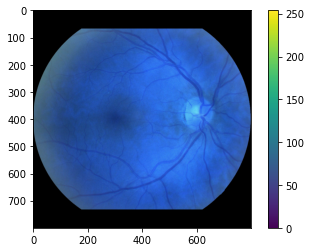

In [7]:
import random
plt.figure()
plt.imshow(random.sample(images, 1)[0])
plt.colorbar()
plt.grid(False)
plt.show()

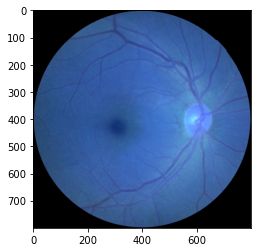

In [8]:
plt.imshow(random.sample(images, 1)[0])

### Plot and observe the differences between the bad and good images on a data subset 

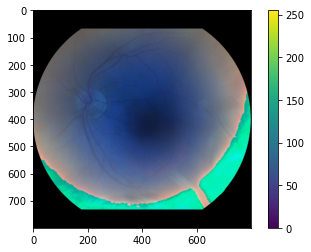

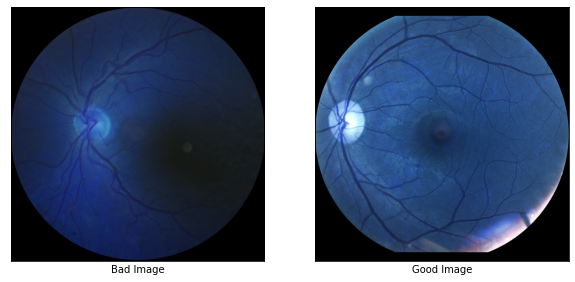

In [9]:
import cv2
import glob
bad_images = [ cv2.imread(f"{image_path}/{file}") for file in simple_model_subset[simple_model_subset['quality']==1]['image'].tolist()]
good_images = [ cv2.imread(f"{image_path}/{file}") for file in simple_model_subset[simple_model_subset['quality']==0]['image'].tolist()]

#print(bad_images)

import random
plt.figure()
plt.imshow(random.sample(bad_images, 1)[0])
plt.colorbar()
plt.grid(False)
plt.show()
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random.sample(bad_images, 1)[0])
plt.xlabel("Bad Image")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random.sample(good_images, 1)[0])
plt.xlabel("Good Image")
plt.show()

### Explore the Data 

<ipython-input-10-cda76778eef2>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,2,1+i)


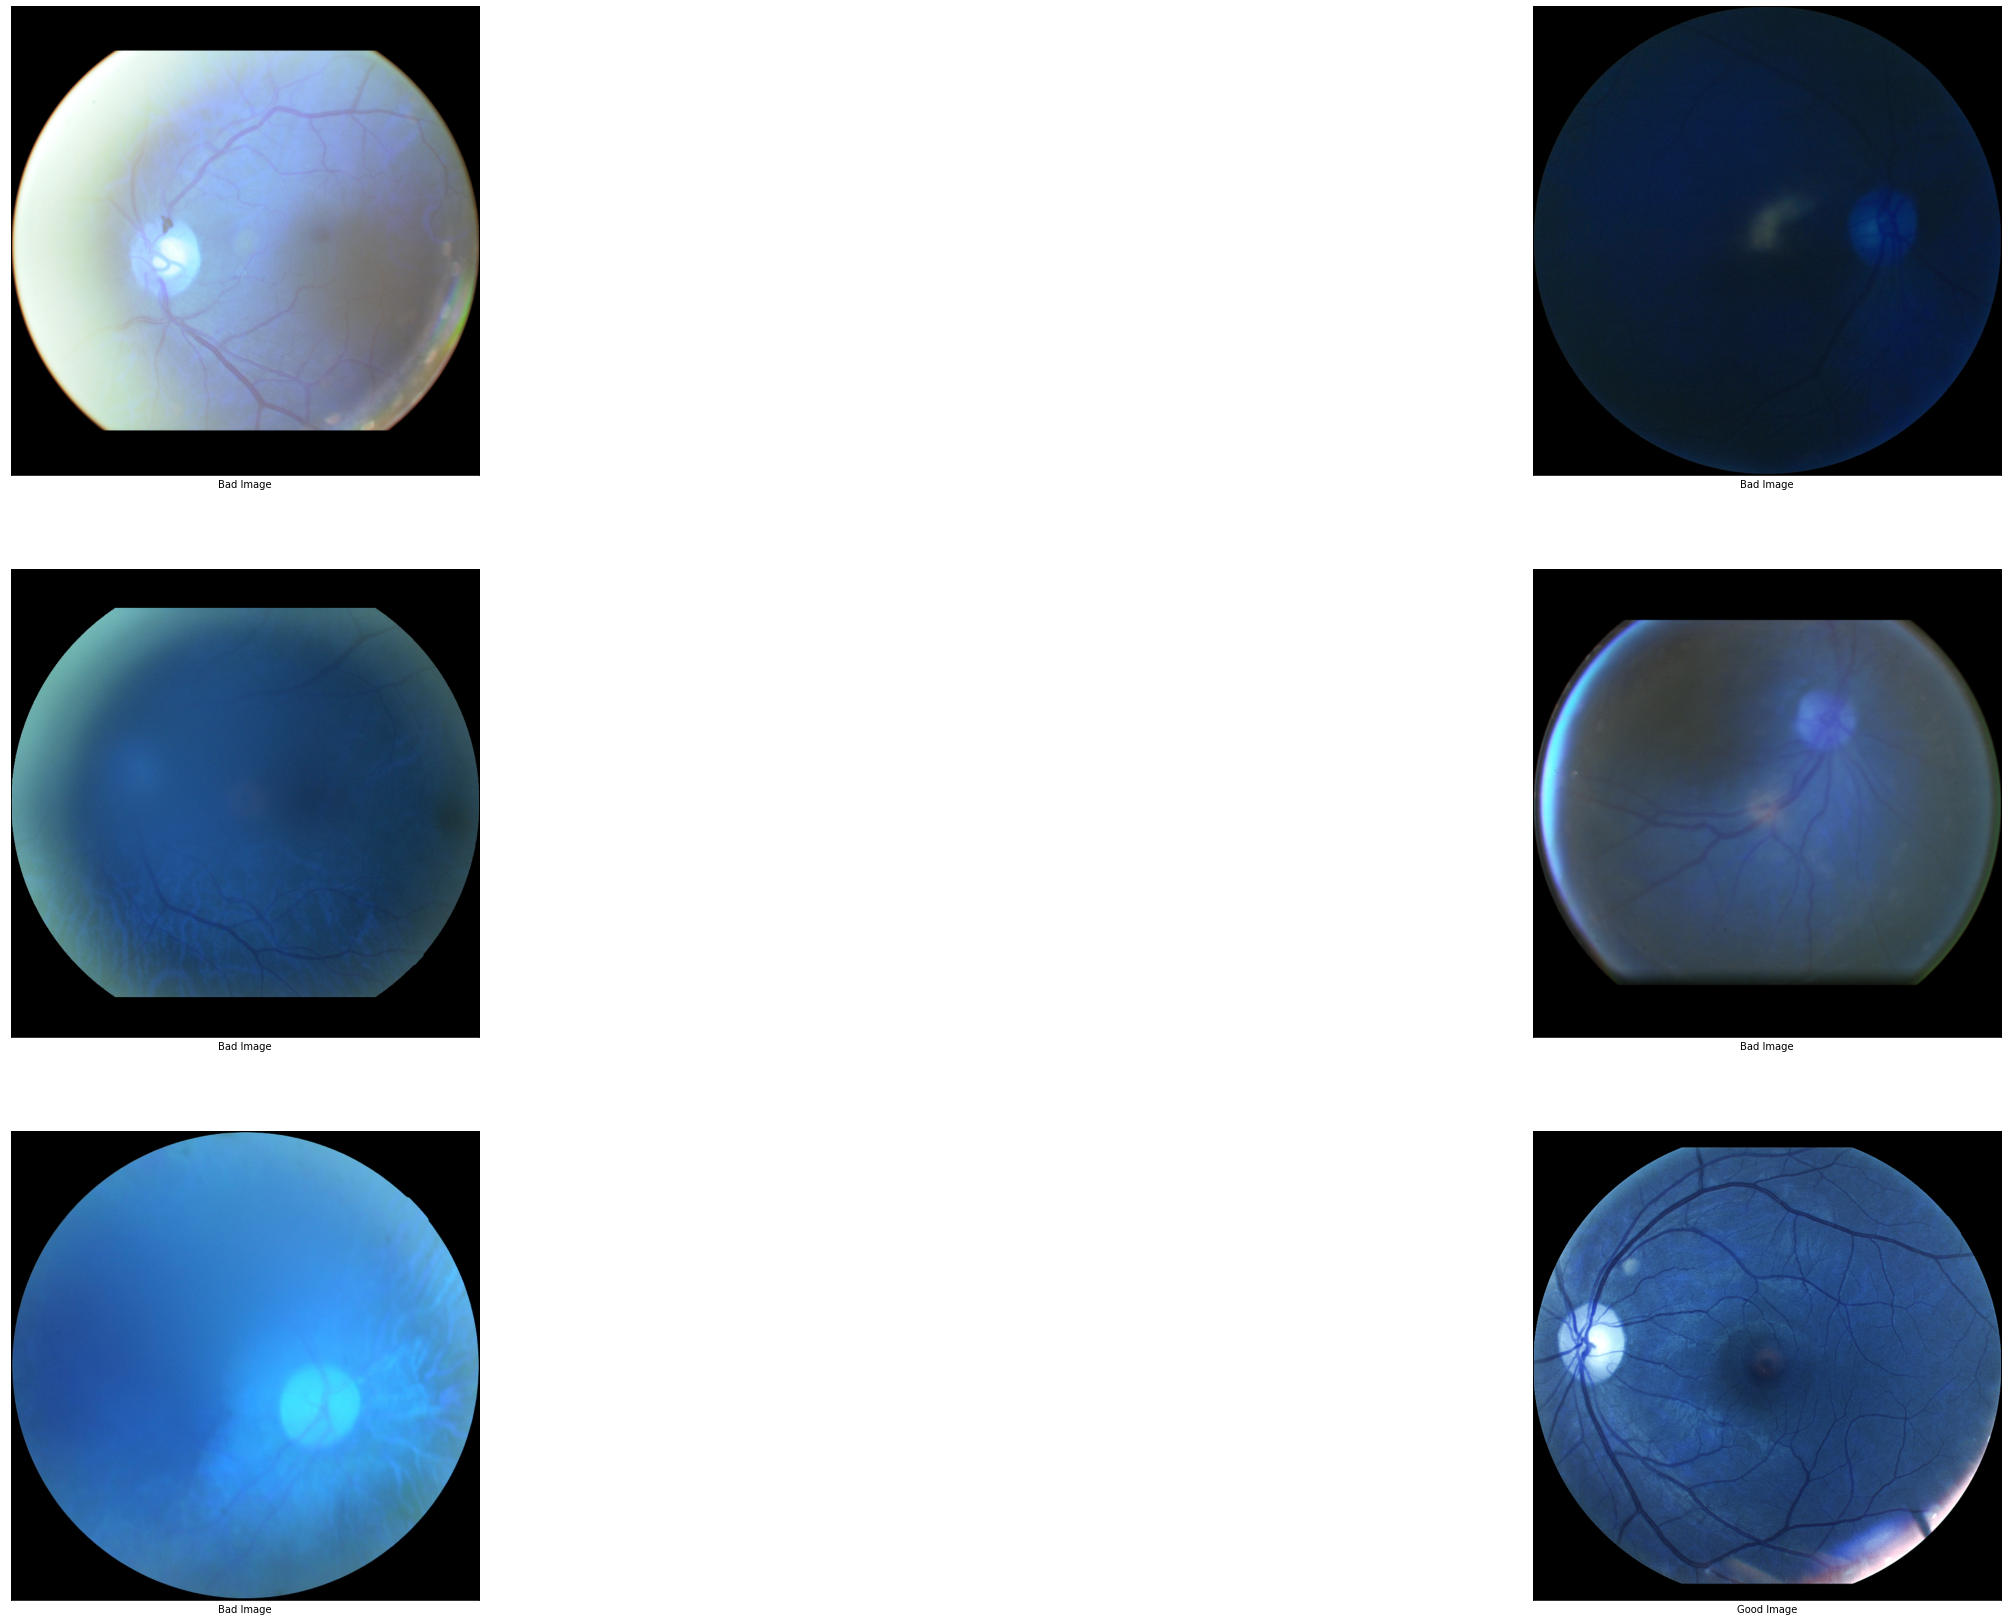

In [10]:
plt.figure(figsize=(50,50))
for i in range(5):
    plt.subplot(5,2,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(random.sample(bad_images, 1)[0])
    plt.xlabel("Bad Image")

    plt.subplot(5,2,2+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(random.sample(good_images, 1)[0])
    plt.xlabel("Good Image")
plt.show()

# Step 1: Simple Model 

Now that we gained insights about the dataset, we can start building models for predicting image quality. In this section, build a model for classifying the images into good and bad classes only using the small data subset. This subset has 300 images from good (label 0) and bad (label 1) classes. Given the size of the dataset, we do not expect you to train a neural network in this section. Feel free to use any other model you like. 

In [11]:
def preprocess(good_images, bad_images):
    X = list.copy(good_images)
    X.extend(bad_images)
    y = list.copy(list(np.zeros(len(good_images))))
    y.extend(np.ones(len(bad_images)))
    X = [x.reshape(-1) for x in X]
    return X, y

X, y = preprocess(good_images, bad_images)

print(X[0],y[0])        #good image
print(X[-120],y[-120])  #bad image


[0 0 0 ... 0 0 0] 0.0
[0 0 0 ... 0 0 0] 1.0


### Q: Define a model for training 

Tell us why you picked this model. What are the advantages/disadvantages?

### Your Answer:

In [12]:
#Data has two category, bad, good and they are balanced.
#For simple model, I prefer to extract some features like color, mean, std of gray-level,
#signal to noise ratio (SNR), contrast to noise ratio (CNR), Perception based Image Quality 
#Evaluator (PIQE) no-reference image quality score, etc. We can try a classifier and then check 
#feature importance, too. I have no idea if these features are enough good for this classification. 
#We have two categories, so I used logistic regression model. It gives a propability function for two
#categories. Input is numerical values, output is class or categorical. Practically it is a good and 
#simple classifier. 
# I do not have much time, so I selected test_size=0.95. but later you select it 0.25

#splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0)

# I do not have much time, so I selected test_size=0.95. but later you select it 0.25

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

# you can use accuracy or cofusion matrix for evalaution. Since data is balanced accuracy is fine. 

LogisticRegression()

### Q: Metrics

- Explain what metrics you will use for evaluating model performance. 
- If the task was multi level classification (good, accept, bad), what metrics would you be looking at?
- In the case where data is not evenly distributed accross classes, how would you modify the mentioned metrics or add other metrics to best present your model performance?

### Your Answer: 

In [13]:
# Use score method to get accuracy of model
#other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), 
#(fraction of correct predictions): correct predictions / total number of data points
#in case that data are imbalanced, confusion matrix is better, 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
score = logisticRegr.score(x_test, y_test)
print(score)

0.6


In [14]:
#Confusion Matrix

import matplotlib.pyplot as plt
from sklearn import metrics

predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[6 0]
 [6 3]]


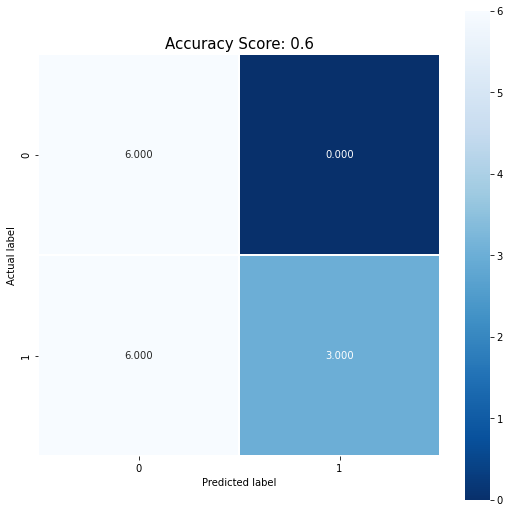

In [15]:
#visualization of confusion matrix

import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Q: Train & Test

Train/test the model of your choice and present the results. 

### Your Answer:

In [16]:
#Answered above, please see above

### Q: Plotting Predictions

Part of making a good model is visualizing the results. Update the image plotting function to inspect where the model is working and where it is not. 

### Your Answer:

In [17]:
#use this code if you want to visualize miscalssified images
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
    
#plt.figure(figsize=(20,4))
#for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
#    plt.subplot(1,5,plotIndex + 1)
#    plt.imshow(np.reshape(x_test[badIndex],(800,800)), cmap=plt.cm.gray)
#    #plt.title(‘Predicted:{}, Actual:{}’.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)    

### Q: Improvements 

Describe what steps, if any, should be taken to make the model perform better.

### Your Answer:

In [18]:
# Dataset is too small to be representative of a real world machine learning task.
#solution1:use k-fold cross-validation 
#solution2:For simple model, I prefer to extract some new features like color, mean, std 
#of gray-level, signal to noise ratio (SNR), contrast to noise ratio (CNR),
#Perception based Image Quality Evaluator (PIQE) no-reference image quality score,
#etc. We can try a classifier and then check feature importance, too. 
#I have no idea if these features are enough good for this classification. 
# solution 3:Data augmentation because we have few samples,

# Step 2: CNN Model

In this section, we will train a CNN model to classify the images into good and bad classes using the larger data subset. This dataset has 1000 images good (label 0) and bad (label 1) classes. Feel free to use any model including 
pre-trained models. 

In [19]:
# in pytorch

# import torch.nn as nn
# import torchvision
# from torchvision import transforms

# class Cnn(nn.Module):
#     def __init__(self, dropout=0.5):
#         super(Cnn, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
#         self.conv2_drop = nn.Dropout2d(p=dropout)
#         self.fc1 = nn.Linear(1600, 100) # 1600 = number channels * width * height
#         self.fc2 = nn.Linear(100, 10)
#         self.fc1_drop = nn.Dropout(p=dropout)

#     def forward(self, x):
#         x = torch.relu(F.max_pool2d(self.conv1(x), 2))
#         x = torch.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        
#         # flatten over channel, height and width = 1600
#         x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        
#         x = torch.relu(self.fc1_drop(self.fc1(x)))
#         x = torch.softmax(self.fc2(x), dim=-1)
#         return x

In [20]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset

# Resizing images
dim = (30, 30 )

X, y = preprocess(good_images, bad_images)
X_scaled = [cv2.resize(img, dim) for img in X]

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=0)

# building the input vector from the 30x30 pixels
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(x_train.shape[0], dim[0], dim[1], 1)
x_test = x_test.reshape(x_test.shape[0], dim[0], dim[1], 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# one-hot encoding using keras' numpy-related utilities
n_classes = 2

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [21]:
X_scaled[0].shape

(30, 30)

In [22]:
from tensorflow.keras import layers
import tensorflow as tf

num_classes = 2
img_height = 30
img_width = 30

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

## Q: Loss function

Your model predicts the quality of an image. At this step we have two classes: good and bad. Tell us which loss function you will be using & why?

### Your Answer:


In [23]:
#In pytorch I can use BCE loss for the binary classification tasks. If you are using BCE loss function, you just need one output node to classify the data into two classes. The output value should be passed through a sigmoid activation function and the range 
#of output is (0 – 1).

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 30, 30, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1843328   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [26]:
history = model.fit(x_train, Y_train, batch_size=128, epochs=10, validation_data=(x_test, Y_test))

Epoch 1/10
3/3 [==============================] - 1s 112ms/step - loss: 0.6980 - accuracy: 0.5579 - val_loss: 0.6433 - val_accuracy: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 46ms/step - loss: 0.6678 - accuracy: 0.6211 - val_loss: 0.5663 - val_accuracy: 0.8667
Epoch 3/10
3/3 [==============================] - 0s 47ms/step - loss: 0.6415 - accuracy: 0.6246 - val_loss: 0.5958 - val_accuracy: 0.4667
Epoch 4/10
3/3 [==============================] - 0s 48ms/step - loss: 0.6318 - accuracy: 0.6456 - val_loss: 0.4639 - val_accuracy: 0.9333
Epoch 5/10
3/3 [==============================] - 0s 53ms/step - loss: 0.5512 - accuracy: 0.7579 - val_loss: 0.4221 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 46ms/step - loss: 0.5200 - accuracy: 0.7860 - val_loss: 0.3937 - val_accuracy: 0.9333
Epoch 7/10
3/3 [==============================] - 0s 50ms/step - loss: 0.5011 - accuracy: 0.7789 - val_loss: 0.3555 - val_accuracy: 0.8667
Epoch 8/10
3/3 [==========

## Q: Train the model

### Your Answer:

In [ ]:
#answered above

## Q: Training Metrics

Plot the loss and any other metric of interest on the training and validation data. What observations or comments can you making regarding the training job?

### Your Answer:

In [ ]:
#answered above

## Q: Plotting Predictions
Plot some of model predictions with true labels. Share your insights
### Your Answer:

## Q: Improvements
Describe what steps, if any, should be taken to make the model perform better. If you have time, try to sort any issues that you've identified and train a new model. Feel free to write your own functions in the notebook to inspect / correct the training data, if necessary. 
- Is your model making any obvious errors? 
- Compare the results of the CNN model with the simple model you trained earlier. Comment on the outcome of this comparison.

### Your Answer:

In [ ]:
#using Resnet, with pretrained network on public dataset

# Step 3: Multi-level Classification

In this stage, consider building a model to predict the image quality with multiple class labels: good, accept and bad. You are not expected to provide code or achieve perfection! Rather, we would like to at least see in writing what next steps you think are useful and why. Specifically, try to address:
- What methods you would implement from a model and/or data preprocessing standpoint
- What challenges you foresee in implementing your selected model and/or data preprocessing approach
- How you would evaluate a model that predicts these 3-class labels against the previous models?

In [ ]:
## There is a solution here:
#https://machinelearningmastery.com/multi-label-classification-with-deep-learning/#:~:text=Multi%2Dlabel%20classification%20involves%20predicting,exclusive%20classes%20or%20%E2%80%9Clabels.%E2%80%9D

# We can use CNN or any deep model like ResNet with softmax at last layer for
#a supervised multi-class classification. If we want to use supervised methods: We know that
#we just have two categories (label 0, label 1), If we want to classify in three categories,
#I think we can use previous model and if we are getting probability for a test image between 70%
#to 90%,we can label it as "accept". If probability is more than 90%,we say it is good, 
# if the probability is less than 70%, we say it is bad. This scenario is just for labeling data into three categories using pretrained netweork,
# Then, we can train a model with three category.

#however, I prefer to use unsupervised learning methods, We may have challenges, like too small datasets.


In [ ]:
# for evaluation: confusion matrix 

In [ ]:
# Data is too small, we need data augmentation, k-fold cross-validatin, using pre-trained networks, etc.